# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

The goal of this project is to predict salaries using certain variables such as job type, years of experience, etc. 

I will use Mean Sqaured Error(MSE) as the evaluation metric. 

In [19]:
#import libraries
%matplotlib inline

import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

__author__ = "Cici Du"
__email__ = "ciciechodu@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [20]:
salary = pd.read_csv('data/train_salaries.csv')

salary.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [21]:
variables = pd.read_csv('data/train_features.csv')

variables.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


### ---- 3 Clean the data ----

In [22]:
#check for null values
salary.isnull().any()

jobId     False
salary    False
dtype: bool

In [23]:
variables.isnull().any()

jobId                  False
companyId              False
jobType                False
degree                 False
major                  False
industry               False
yearsExperience        False
milesFromMetropolis    False
dtype: bool

In [24]:
#drop duplicates if any 
salary.drop_duplicates()
variables.drop_duplicates()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5


In [25]:
#drop records where salary is equal or less than 0
salary = salary.loc[salary['salary'] > 0]

In [26]:
#merge the datasets
salary_df = pd.merge(salary, variables, how='inner', on='jobId')

#drop jobId
salary_df = salary_df.drop(['jobId'], axis = 1)

salary_df.shape

(999995, 8)

### ---- 4 Explore the data (EDA) ----

In [27]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999994
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   salary               999995 non-null  int64 
 1   companyId            999995 non-null  object
 2   jobType              999995 non-null  object
 3   degree               999995 non-null  object
 4   major                999995 non-null  object
 5   industry             999995 non-null  object
 6   yearsExperience      999995 non-null  int64 
 7   milesFromMetropolis  999995 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 68.7+ MB


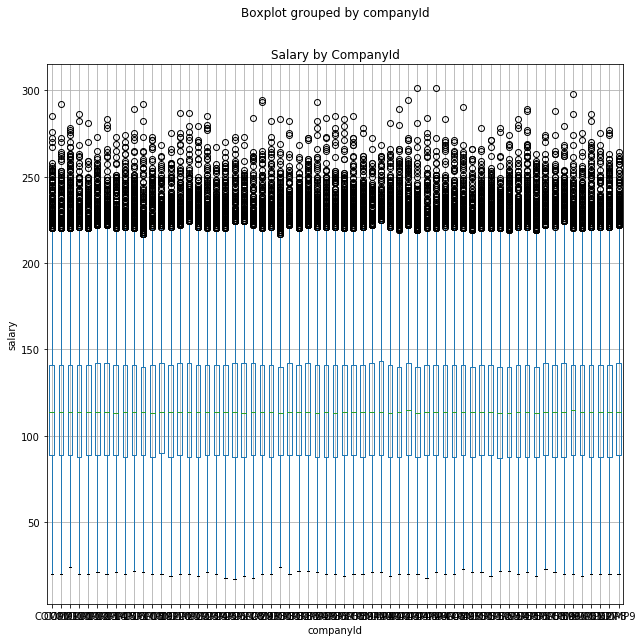

In [30]:
#check if companyid has a big impact 
salary_df.boxplot(column='salary',by='companyId',figsize = (10,10)) 
plt.ylabel('salary')
plt.title('Salary by CompanyId');

In [31]:
#drop companyid to simplify the analysis as it does not seem to make a big difference
salary_df = salary_df.drop(['companyId'], axis = 1)

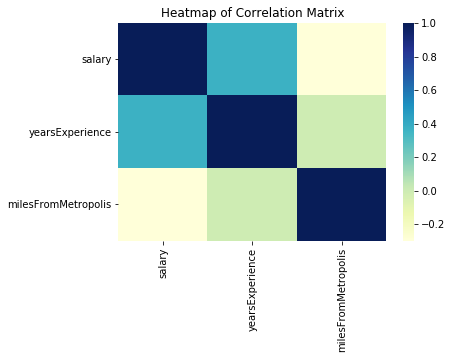

In [32]:
#explore correlation of the numerical varivales 

corr = salary_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
          cmap="YlGnBu")
plt.title('Heatmap of Correlation Matrix');

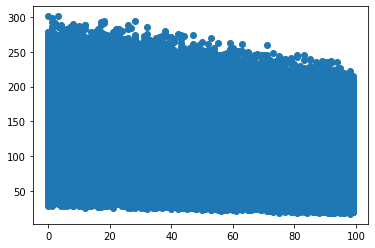

In [33]:
plt.scatter(salary_df['milesFromMetropolis'], salary_df['salary']);

#will keep this variable as there appears to be a relationship beween salary and milesFromMetropolis

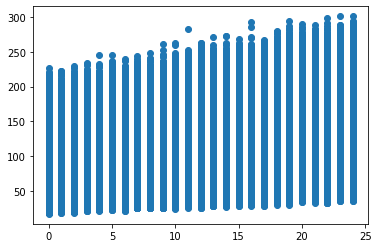

In [34]:
plt.scatter(salary_df['yearsExperience'], salary_df['salary']);

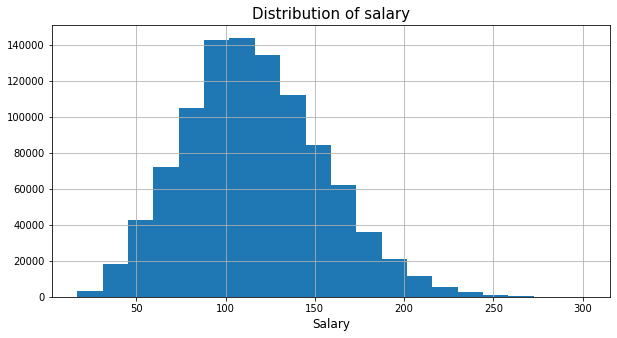

In [35]:
#explore the distribution of salary

salary_df['salary'].hist(bins=20, figsize=(10,5))
plt.xlabel('Salary', fontsize=12)
plt.title('Distribution of salary', fontsize=15);

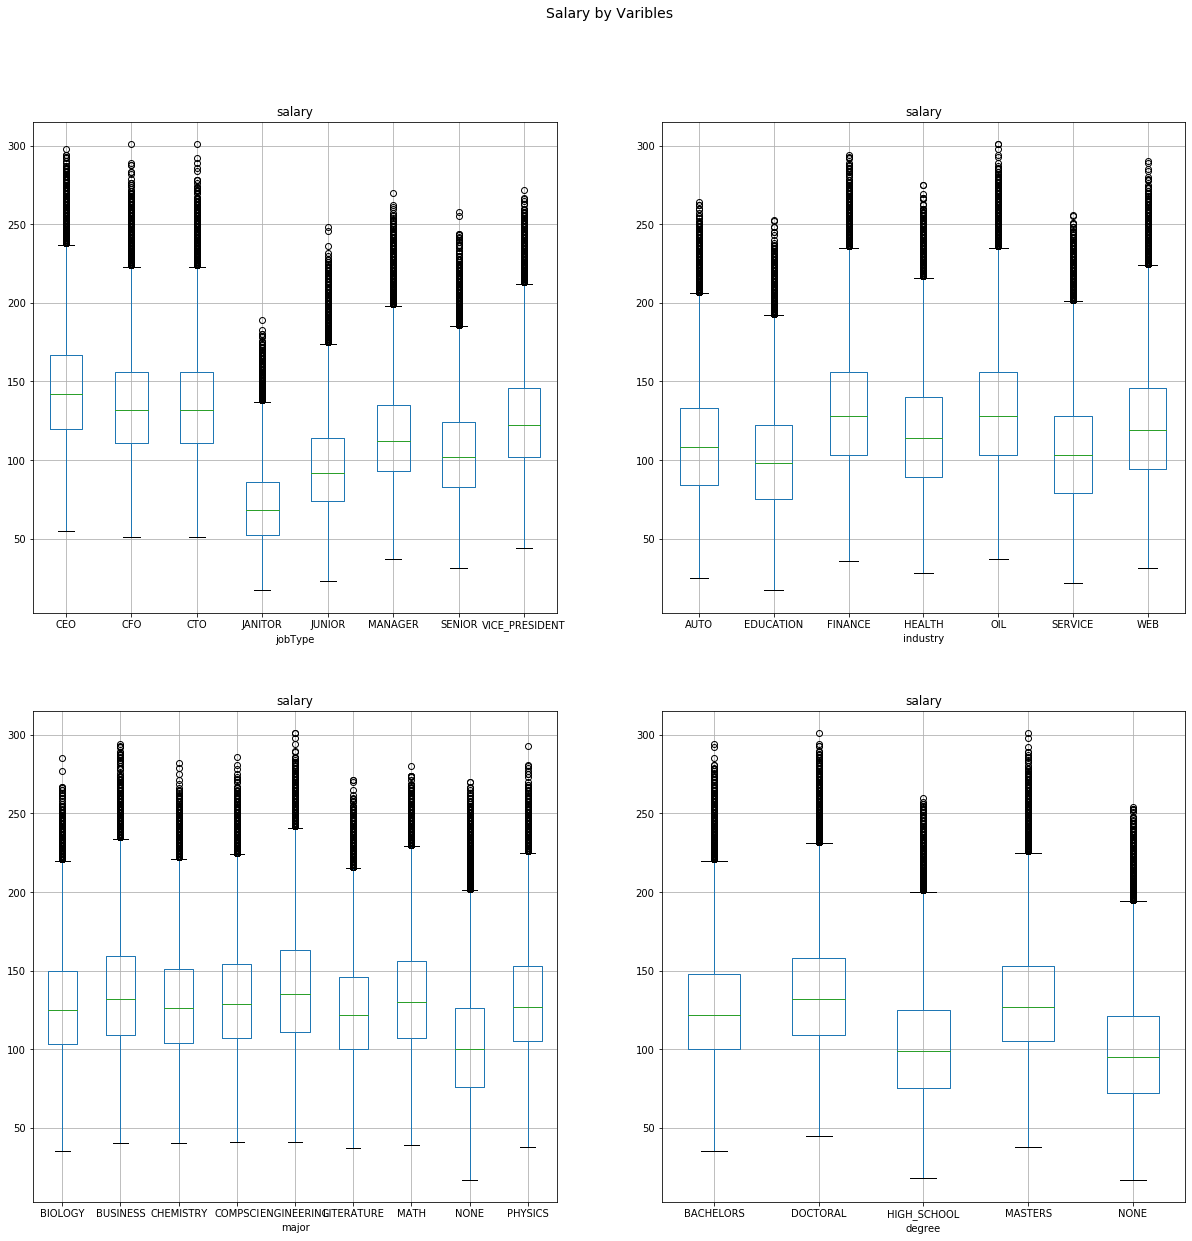

In [37]:
#explore other variables
fig,axes = plt.subplots(2,2, figsize = (20,20))

salary_df.boxplot(column='salary',by='jobType',ax = axes[0][0]) 
salary_df.boxplot(column='salary',by='industry',ax = axes[0][1]) 
salary_df.boxplot(column='salary',by='major',ax = axes[1][0]) 
salary_df.boxplot(column='salary',by='degree',ax = axes[1][1]) 

fig.suptitle("Salary by Varibles", fontsize=14);

In [38]:
#encode categorical vairbles

cat_var = ['jobType','degree','major','industry']
num_var = ['salary','yearsExperience','milesFromMetropolis']
categorical_df = pd.get_dummies(salary_df[cat_var], drop_first=True)
numerical_df = salary_df[num_var]

encoded_salary_df = pd.concat([numerical_df,categorical_df,], axis=1)
encoded_salary_df.head()

,salary,yearsExperience,milesFromMetropolis,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,...,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,130,10,83,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,101,3,73,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,137,10,38,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
3,142,8,17,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,163,8,16,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0


### ---- 5 Establish a baseline ----

In [39]:
#Auume there is a linear relationship between salary and years of experience

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
x = np.array(salary_df['yearsExperience']).reshape(999995,1)
y = np.array(salary_df['salary']).reshape(999995,1)

In [40]:
#split the datasets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 1)

In [41]:
lr.fit(x_train,y_train)
salary_pred = lr.predict(x_test)

In [42]:
#Calculate the MSE

print(sk.metrics.mean_squared_error(y_test, salary_pred))

1291.6288901855746


## Part 3 - DEVELOP

### ---- 6 Create Model ----

Model : Linear Regression

In [44]:
lr_2 = LinearRegression()
x = encoded_salary_df.loc[:, encoded_salary_df.columns != 'salary']
y = encoded_salary_df['salary']

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 1)

lr_2.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### ---- 7 Test models ----

In [45]:
salary_pred_2 = lr_2.predict(x_test)
print(sk.metrics.mean_squared_error(y_test, salary_pred_2))

383.72829491856425


This linear regression model performs better than the baseline.